# U.S.A. Crimes in 2015 #

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium
import json
from branca.colormap import linear

pd.options.mode.chained_assignment = None

For first **we read the orginal *datasat* and we convert it as a *Pandas dataframe*.**

In [2]:
crimes2015 = os.path.join('data', 'Table_5_Crime_in_the_United_States_by_State_2015.xls')
data1 = pd.read_excel(crimes2015)
data1

State                               Area  \
0          ALABAMA      Metropolitan Statistical Area   
1          ALABAMA  Cities outside metropolitan areas   
2          ALABAMA           Nonmetropolitan counties   
3          ALABAMA                        State Total   
4           ALASKA      Metropolitan Statistical Area   
5           ALASKA  Cities outside metropolitan areas   
6           ALASKA           Nonmetropolitan counties   
7           ALASKA                        State Total   
8          ARIZONA      Metropolitan Statistical Area   
9          ARIZONA  Cities outside metropolitan areas   
10         ARIZONA           Nonmetropolitan counties   
11         ARIZONA                        State Total   
12        ARKANSAS      Metropolitan Statistical Area   
13        ARKANSAS  Cities outside metropolitan areas   
14        ARKANSAS           Nonmetropolitan counties   
15        ARKANSAS                        State Total   
16      CALIFORNIA      Metropolitan Statistical Area   
17      CALIFORNIA  Cities outside metropolitan areas   
18      CALIFORNIA           Nonmetropolitan counties   
19      CALIFORNIA                        State Total   
20        COLORADO      Metropolitan Statistical Area   
21        COLORADO  Cities outside metropolitan areas   
22        COLORADO           Nonmetropolitan counties   
23        COLORADO                        State Total   
24     CONNECTICUT      Metropolitan Statistical Area   
25     CONNECTICUT  Cities outside metropolitan areas   
26     CONNECTICUT           Nonmetropolitan counties   
27     CONNECTICUT                        State Total   
28        DELAWARE      Metropolitan Statistical Area   
29        DELAWARE  Cities outside metropolitan areas   
..             ...                                ...   
177          TEXAS           Nonmetropolitan counties   
178          TEXAS                        State Total   
179           UTAH      Metropolitan Statistical Area   
180           UTAH  Cities outside metropolitan areas   
181           UTAH           Nonmetropolitan counties   
182           UTAH                        State Total   
183        VERMONT      Metropolitan Statistical Area   
184        VERMONT  Cities outside metropolitan areas   
185        VERMONT           Nonmetropolitan counties   
186        VERMONT                        State Total   
187       VIRGINIA      Metropolitan Statistical Area   
188       VIRGINIA  Cities outside metropolitan areas   
189       VIRGINIA           Nonmetropolitan counties   
190       VIRGINIA                        State Total   
191     WASHINGTON      Metropolitan Statistical Area   
192     WASHINGTON  Cities outside metropolitan areas   
193     WASHINGTON           Nonmetropolitan counties   
194     WASHINGTON                        State Total   
195  WEST VIRGINIA      Metropolitan Statistical Area   
196  WEST VIRGINIA  Cities outside metropolitan areas   
197  WEST VIRGINIA           Nonmetropolitan counties   
198  WEST VIRGINIA                        State Total   
199      WISCONSIN      Metropolitan Statistical Area   
200      WISCONSIN  Cities outside metropolitan areas   
201      WISCONSIN           Nonmetropolitan counties   
202      WISCONSIN                        State Total   
203        WYOMING      Metropolitan Statistical Area   
204        WYOMING  Cities outside metropolitan areas   
205        WYOMING           Nonmetropolitan counties   
206        WYOMING                        State Total   

                   Unnamed: 2 Population  Violent crime  \
0     Area actually reporting    3708033        18122.0   
1     Area actually reporting     522241         3178.0   
2     Area actually reporting     628705         1205.0   
3                         NaN    4858979        22952.0   
4     Area actually reporting     351857         3464.0   
5     Area actually reporting     127499          886.0   
6     Area actually reporting     259076         1015.0   
7     

In the *dataframe* there is a column with a wrong name: "**Unnamed: 2**". We rename it as "**DetailArea**".

In [3]:
new_columns = data1.columns.values
new_columns[2] = 'DetailArea'
data1

State                               Area  \
0          ALABAMA      Metropolitan Statistical Area   
1          ALABAMA  Cities outside metropolitan areas   
2          ALABAMA           Nonmetropolitan counties   
3          ALABAMA                        State Total   
4           ALASKA      Metropolitan Statistical Area   
5           ALASKA  Cities outside metropolitan areas   
6           ALASKA           Nonmetropolitan counties   
7           ALASKA                        State Total   
8          ARIZONA      Metropolitan Statistical Area   
9          ARIZONA  Cities outside metropolitan areas   
10         ARIZONA           Nonmetropolitan counties   
11         ARIZONA                        State Total   
12        ARKANSAS      Metropolitan Statistical Area   
13        ARKANSAS  Cities outside metropolitan areas   
14        ARKANSAS           Nonmetropolitan counties   
15        ARKANSAS                        State Total   
16      CALIFORNIA      Metropolitan Statistical Area   
17      CALIFORNIA  Cities outside metropolitan areas   
18      CALIFORNIA           Nonmetropolitan counties   
19      CALIFORNIA                        State Total   
20        COLORADO      Metropolitan Statistical Area   
21        COLORADO  Cities outside metropolitan areas   
22        COLORADO           Nonmetropolitan counties   
23        COLORADO                        State Total   
24     CONNECTICUT      Metropolitan Statistical Area   
25     CONNECTICUT  Cities outside metropolitan areas   
26     CONNECTICUT           Nonmetropolitan counties   
27     CONNECTICUT                        State Total   
28        DELAWARE      Metropolitan Statistical Area   
29        DELAWARE  Cities outside metropolitan areas   
..             ...                                ...   
177          TEXAS           Nonmetropolitan counties   
178          TEXAS                        State Total   
179           UTAH      Metropolitan Statistical Area   
180           UTAH  Cities outside metropolitan areas   
181           UTAH           Nonmetropolitan counties   
182           UTAH                        State Total   
183        VERMONT      Metropolitan Statistical Area   
184        VERMONT  Cities outside metropolitan areas   
185        VERMONT           Nonmetropolitan counties   
186        VERMONT                        State Total   
187       VIRGINIA      Metropolitan Statistical Area   
188       VIRGINIA  Cities outside metropolitan areas   
189       VIRGINIA           Nonmetropolitan counties   
190       VIRGINIA                        State Total   
191     WASHINGTON      Metropolitan Statistical Area   
192     WASHINGTON  Cities outside metropolitan areas   
193     WASHINGTON           Nonmetropolitan counties   
194     WASHINGTON                        State Total   
195  WEST VIRGINIA      Metropolitan Statistical Area   
196  WEST VIRGINIA  Cities outside metropolitan areas   
197  WEST VIRGINIA           Nonmetropolitan counties   
198  WEST VIRGINIA                        State Total   
199      WISCONSIN      Metropolitan Statistical Area   
200      WISCONSIN  Cities outside metropolitan areas   
201      WISCONSIN           Nonmetropolitan counties   
202      WISCONSIN                        State Total   
203        WYOMING      Metropolitan Statistical Area   
204        WYOMING  Cities outside metropolitan areas   
205        WYOMING           Nonmetropolitan counties   
206        WYOMING                        State Total   

                   DetailArea Population  Violent crime  \
0     Area actually reporting    3708033        18122.0   
1     Area actually reporting     522241         3178.0   
2     Area actually reporting     628705         1205.0   
3                         NaN    4858979        22952.0   
4     Area actually reporting     351857         3464.0   
5     Area actually reporting     127499          886.0   
6     Area actually reporting     259076         1015.0   
7     

Inside the *datafarme* there are rows useless for our purpose: the rows which contains the *strings* "**State Total**" or "**Total**" value under "**Area**" column. We delete them from the original dataset.

In [4]:
data1 = data1[data1.Area != 'State Total']
data1 = data1[data1.Area != 'Total']
data1

State                               Area  \
0                 ALABAMA      Metropolitan Statistical Area   
1                 ALABAMA  Cities outside metropolitan areas   
2                 ALABAMA           Nonmetropolitan counties   
4                  ALASKA      Metropolitan Statistical Area   
5                  ALASKA  Cities outside metropolitan areas   
6                  ALASKA           Nonmetropolitan counties   
8                 ARIZONA      Metropolitan Statistical Area   
9                 ARIZONA  Cities outside metropolitan areas   
10                ARIZONA           Nonmetropolitan counties   
12               ARKANSAS      Metropolitan Statistical Area   
13               ARKANSAS  Cities outside metropolitan areas   
14               ARKANSAS           Nonmetropolitan counties   
16             CALIFORNIA      Metropolitan Statistical Area   
17             CALIFORNIA  Cities outside metropolitan areas   
18             CALIFORNIA           Nonmetropolitan counties   
20               COLORADO      Metropolitan Statistical Area   
21               COLORADO  Cities outside metropolitan areas   
22               COLORADO           Nonmetropolitan counties   
24            CONNECTICUT      Metropolitan Statistical Area   
25            CONNECTICUT  Cities outside metropolitan areas   
26            CONNECTICUT           Nonmetropolitan counties   
28               DELAWARE      Metropolitan Statistical Area   
29               DELAWARE  Cities outside metropolitan areas   
30               DELAWARE           Nonmetropolitan counties   
32   DISTRICT OF COLUMBIA      Metropolitan Statistical Area   
33   DISTRICT OF COLUMBIA  Cities outside metropolitan areas   
34   DISTRICT OF COLUMBIA           Nonmetropolitan counties   
36                FLORIDA      Metropolitan Statistical Area   
37                FLORIDA  Cities outside metropolitan areas   
38                FLORIDA           Nonmetropolitan counties   
..                    ...                                ...   
167          SOUTH DAKOTA      Metropolitan Statistical Area   
168          SOUTH DAKOTA  Cities outside metropolitan areas   
169          SOUTH DAKOTA           Nonmetropolitan counties   
171             TENNESSEE      Metropolitan Statistical Area   
172             TENNESSEE  Cities outside metropolitan areas   
173             TENNESSEE           Nonmetropolitan counties   
175                 TEXAS      Metropolitan Statistical Area   
176                 TEXAS  Cities outside metropolitan areas   
177                 TEXAS           Nonmetropolitan counties   
179                  UTAH      Metropolitan Statistical Area   
180                  UTAH  Cities outside metropolitan areas   
181                  UTAH           Nonmetropolitan counties   
183               VERMONT      Metropolitan Statistical Area   
184               VERMONT  Cities outside metropolitan areas   
185               VERMONT           Nonmetropolitan counties   
187              VIRGINIA      Metropolitan Statistical Area   
188              VIRGINIA  Cities outside metropolitan areas   
189              VIRGINIA           Nonmetropolitan counties   
191            WASHINGTON      Metropolitan Statistical Area   
192            WASHINGTON  Cities outside metropolitan areas   
193            WASHINGTON           Nonmetropolitan counties   
195         WEST VIRGINIA      Metropolitan Statistical Area   
196         WEST VIRGINIA  Cities outside metropolitan areas   
197         WEST VIRGINIA           Nonmetropolitan counties   
199             WISCONSIN      Metropolitan Statistical Area   
200             WISCONSIN  Cities outside metropolitan areas   
201             WISCONSIN           Nonmetropolitan counties   
203               WYOMING      Metropolitan Statistical Area   
204               WYOMING  Cities outside metropolitan areas   
205               WYOMING           Nonmetropolitan counties   

                   DetailArea Population  Violent c

The number below the columns "**Population**" and "**'Murder and nonnegligent manslaughter'**" are *objects* so we convert them as *float*.

In [5]:
data1['Population'] = pd.to_numeric(data1['Population'], errors='coerce')
data1['Murder and nonnegligent manslaughter'] = pd.to_numeric(data1['Murder and nonnegligent manslaughter'], errors='coerce')
data1

State                               Area  \
0                 ALABAMA      Metropolitan Statistical Area   
1                 ALABAMA  Cities outside metropolitan areas   
2                 ALABAMA           Nonmetropolitan counties   
4                  ALASKA      Metropolitan Statistical Area   
5                  ALASKA  Cities outside metropolitan areas   
6                  ALASKA           Nonmetropolitan counties   
8                 ARIZONA      Metropolitan Statistical Area   
9                 ARIZONA  Cities outside metropolitan areas   
10                ARIZONA           Nonmetropolitan counties   
12               ARKANSAS      Metropolitan Statistical Area   
13               ARKANSAS  Cities outside metropolitan areas   
14               ARKANSAS           Nonmetropolitan counties   
16             CALIFORNIA      Metropolitan Statistical Area   
17             CALIFORNIA  Cities outside metropolitan areas   
18             CALIFORNIA           Nonmetropolitan counties   
20               COLORADO      Metropolitan Statistical Area   
21               COLORADO  Cities outside metropolitan areas   
22               COLORADO           Nonmetropolitan counties   
24            CONNECTICUT      Metropolitan Statistical Area   
25            CONNECTICUT  Cities outside metropolitan areas   
26            CONNECTICUT           Nonmetropolitan counties   
28               DELAWARE      Metropolitan Statistical Area   
29               DELAWARE  Cities outside metropolitan areas   
30               DELAWARE           Nonmetropolitan counties   
32   DISTRICT OF COLUMBIA      Metropolitan Statistical Area   
33   DISTRICT OF COLUMBIA  Cities outside metropolitan areas   
34   DISTRICT OF COLUMBIA           Nonmetropolitan counties   
36                FLORIDA      Metropolitan Statistical Area   
37                FLORIDA  Cities outside metropolitan areas   
38                FLORIDA           Nonmetropolitan counties   
..                    ...                                ...   
167          SOUTH DAKOTA      Metropolitan Statistical Area   
168          SOUTH DAKOTA  Cities outside metropolitan areas   
169          SOUTH DAKOTA           Nonmetropolitan counties   
171             TENNESSEE      Metropolitan Statistical Area   
172             TENNESSEE  Cities outside metropolitan areas   
173             TENNESSEE           Nonmetropolitan counties   
175                 TEXAS      Metropolitan Statistical Area   
176                 TEXAS  Cities outside metropolitan areas   
177                 TEXAS           Nonmetropolitan counties   
179                  UTAH      Metropolitan Statistical Area   
180                  UTAH  Cities outside metropolitan areas   
181                  UTAH           Nonmetropolitan counties   
183               VERMONT      Metropolitan Statistical Area   
184               VERMONT  Cities outside metropolitan areas   
185               VERMONT           Nonmetropolitan counties   
187              VIRGINIA      Metropolitan Statistical Area   
188              VIRGINIA  Cities outside metropolitan areas   
189              VIRGINIA           Nonmetropolitan counties   
191            WASHINGTON      Metropolitan Statistical Area   
192            WASHINGTON  Cities outside metropolitan areas   
193            WASHINGTON           Nonmetropolitan counties   
195         WEST VIRGINIA      Metropolitan Statistical Area   
196         WEST VIRGINIA  Cities outside metropolitan areas   
197         WEST VIRGINIA           Nonmetropolitan counties   
199             WISCONSIN      Metropolitan Statistical Area   
200             WISCONSIN  Cities outside metropolitan areas   
201             WISCONSIN           Nonmetropolitan counties   
203               WYOMING      Metropolitan Statistical Area   
204               WYOMING  Cities outside metropolitan areas   
205               WYOMING           Nonmetropolitan counties   

                   DetailArea  Population  Violent 

We load the **GeoJSON** for the states geographical areas of **USA**.

In [6]:
us_states = os.path.join('data','us-states.json')

USstates = json.load(open(us_states))
USstates

{'features': [{'geometry': {'coordinates': [[[-87.359296, 35.00118],
      [-85.606675, 34.984749],
      [-85.431413, 34.124869],
      [-85.184951, 32.859696],
      [-85.069935, 32.580372],
      [-84.960397, 32.421541],
      [-85.004212, 32.322956],
      [-84.889196, 32.262709],
      [-85.058981, 32.13674],
      [-85.053504, 32.01077],
      [-85.141136, 31.840985],
      [-85.042551, 31.539753],
      [-85.113751, 31.27686],
      [-85.004212, 31.003013],
      [-85.497137, 30.997536],
      [-87.600282, 30.997536],
      [-87.633143, 30.86609],
      [-87.408589, 30.674397],
      [-87.446927, 30.510088],
      [-87.37025, 30.427934],
      [-87.518128, 30.280057],
      [-87.655051, 30.247195],
      [-87.90699, 30.411504],
      [-87.934375, 30.657966],
      [-88.011052, 30.685351],
      [-88.10416, 30.499135],
      [-88.137022, 30.318396],
      [-88.394438, 30.367688],
      [-88.471115, 31.895754],
      [-88.241084, 33.796253],
      [-88.098683, 34.891641],
      [-

We convert the values inside the "**features**" attributes as a new dataframe.

In [7]:
df_reg = pd.DataFrame(USstates['features'])
df_reg

geometry  id  \
0   {'type': 'Polygon', 'coordinates': [[[-87.3592...  AL   
1   {'type': 'MultiPolygon', 'coordinates': [[[[-1...  AK   
2   {'type': 'Polygon', 'coordinates': [[[-109.042...  AZ   
3   {'type': 'Polygon', 'coordinates': [[[-94.4738...  AR   
4   {'type': 'Polygon', 'coordinates': [[[-123.233...  CA   
5   {'type': 'Polygon', 'coordinates': [[[-107.919...  CO   
6   {'type': 'Polygon', 'coordinates': [[[-73.0535...  CT   
7   {'type': 'Polygon', 'coordinates': [[[-75.4140...  DE   
8   {'type': 'Polygon', 'coordinates': [[[-85.4971...  FL   
9   {'type': 'Polygon', 'coordinates': [[[-83.1091...  GA   
10  {'type': 'MultiPolygon', 'coordinates': [[[[-1...  HI   
11  {'type': 'Polygon', 'coordinates': [[[-116.047...  ID   
12  {'type': 'Polygon', 'coordinates': [[[-90.6399...  IL   
13  {'type': 'Polygon', 'coordinates': [[[-85.9900...  IN   
14  {'type': 'Polygon', 'coordinates': [[[-91.3684...  IA   
15  {'type': 'Polygon', 'coordinates': [[[-101.906...  KS   
16  {'type': 'Polygon', 'coordinates': [[[-83.9033...  KY   
17  {'type': 'Polygon', 'coordinates': [[[-93.6084...  LA   
18  {'type': 'Polygon', 'coordinates': [[[-70.7039...  ME   
19  {'type': 'MultiPolygon', 'coordinates': [[[[-7...  MD   
20  {'type': 'Polygon', 'coordinates': [[[-70.9175...  MA   
21  {'type': 'MultiPolygon', 'coordinates': [[[[-8...  MI   
22  {'type': 'Polygon', 'coordinates': [[[-92.0146...  MN   
23  {'type': 'Polygon', 'coordinates': [[[-88.4711...  MS   
24  {'type': 'Polygon', 'coordinates': [[[-91.8339...  MO   
25  {'type': 'Polygon', 'coordinates': [[[-104.047...  MT   
26  {'type': 'Polygon', 'coordinates': [[[-103.324...  NE   
27  {'type': 'Polygon', 'coordinates': [[[-117.027...  NV   
28  {'type': 'Polygon', 'coordinates': [[[-71.0818...  NH   
29  {'type': 'Polygon', 'coordinates': [[[-74.2365...  NJ   
30  {'type': 'Polygon', 'coordinates': [[[-107.421...  NM   
31  {'type': 'Polygon', 'coordinates': [[[-73.3438...  NY   
32  {'type': 'Polygon', 'coordinates': [[[-80.9786...  NC   
33  {'type': 'Polygon', 'coordinates': [[[-97.2287...  ND   
34  {'type': 'Polygon', 'coordinates': [[[-80.5185...  OH   
35  {'type': 'Polygon', 'coordinates': [[[-100.087...  OK   
36  {'type': 'Polygon', 'coordinates': [[[-123.211...  OR   
37  {'type': 'Polygon', 'coordinates': [[[-79.7627...  PA   
38  {'type': 'MultiPolygon', 'coordinates': [[[[-7...  RI   
39  {'type': 'Polygon', 'coordinates': [[[-82.7641...  SC   
40  {'type': 'Polygon', 'coordinates': [[[-104.047...  SD   
41  {'type': 'Polygon', 'coordinates': [[[-88.0548...  TN   
42  {'type': 'Polygon', 'coordinates': [[[-101.812...  TX   
43  {'type': 'Polygon', 'coordinates': [[[-112.164...  UT   
44  {'type': 'Polygon', 'coordinates': [[[-71.5035...  VT   
45  {'type': 'MultiPolygon', 'coordinates': [[[[-7...  VA   
46  {'type': 'MultiPolygon', 'coordinates': [[[[-1...  WA   
47  {'type': 'Polygon', 'coordinates': [[[-80.5185...  WV   
48  {'type': 'Polygon', 'coordinates': [[[-90.4154...  WI   
49  {'type': 'Polygon', 'coordinates': [[[-109.080...  WY   

                    properties     type  
0          {'name': 'Alabama'}  Feature  
1           {'name': 'Alaska'}  Feature  
2          {'name': 'Arizona'}  Feature  
3         {'name': 'Arkansas'}  Feature  
4       {'name': 'California'}  Feature  
5         {'name': 'Colorado'}  Feature  
6      {'name': 'Connecticut'}  Feature  
7         {'name': 'Delaware'}  Feature  
8          {'name': 'Florida'}  Feature  
9          {'name': 'Georgia'}  Feature  
10          {'name': 'Hawaii'}  Feature  
11           {'name': 'Idaho'}  Feature  
12        {'name': 'Illinois'}  Feature  
13         {'name': 'Indiana'}  Feature  
14            {'name': 'Iowa'}  Feature  
15          {'name': 'Kansas'}  Feature  
16        {'name': 'Kentucky'}  Feature  
17       {'name': 'Louisiana'}  Feature  
18           {'name': 'Maine'}  Feature  
19        {'name': 'Maryland'}  Feature  
20   {'name': 'Massachusetts'}  Feature  
21       

Inside the column "**id**" there are the ids of all states.

In [8]:
df_reg['id']

0     AL
1     AK
2     AZ
3     AR
4     CA
5     CO
6     CT
7     DE
8     FL
9     GA
10    HI
11    ID
12    IL
13    IN
14    IA
15    KS
16    KY
17    LA
18    ME
19    MD
20    MA
21    MI
22    MN
23    MS
24    MO
25    MT
26    NE
27    NV
28    NH
29    NJ
30    NM
31    NY
32    NC
33    ND
34    OH
35    OK
36    OR
37    PA
38    RI
39    SC
40    SD
41    TN
42    TX
43    UT
44    VT
45    VA
46    WA
47    WV
48    WI
49    WY
Name: id, dtype: object

**We insert all the ids inside a new *dataframe* named "mapping". We will use this *dataframe* to map all the states inside the main *dataframe* with their ids.**

In [9]:
mapping = pd.DataFrame(data = df_reg['id'], columns=['id'])

mapping

id
0   AL
1   AK
2   AZ
3   AR
4   CA
5   CO
6   CT
7   DE
8   FL
9   GA
10  HI
11  ID
12  IL
13  IN
14  IA
15  KS
16  KY
17  LA
18  ME
19  MD
20  MA
21  MI
22  MN
23  MS
24  MO
25  MT
26  NE
27  NV
28  NH
29  NJ
30  NM
31  NY
32  NC
33  ND
34  OH
35  OK
36  OR
37  PA
38  RI
39  SC
40  SD
41  TN
42  TX
43  UT
44  VT
45  VA
46  WA
47  WV
48  WI
49  WY

**We associate to each state id the corresponding state name taken from df_reg dataset inside "properties" column.**

In [10]:
mapping['name'] = [df_reg['properties'][i]['name'] for i in range(50)]
mapping     

id            name
0   AL         Alabama
1   AK          Alaska
2   AZ         Arizona
3   AR        Arkansas
4   CA      California
5   CO        Colorado
6   CT     Connecticut
7   DE        Delaware
8   FL         Florida
9   GA         Georgia
10  HI          Hawaii
11  ID           Idaho
12  IL        Illinois
13  IN         Indiana
14  IA            Iowa
15  KS          Kansas
16  KY        Kentucky
17  LA       Louisiana
18  ME           Maine
19  MD        Maryland
20  MA   Massachusetts
21  MI        Michigan
22  MN       Minnesota
23  MS     Mississippi
24  MO        Missouri
25  MT         Montana
26  NE        Nebraska
27  NV          Nevada
28  NH   New Hampshire
29  NJ      New Jersey
30  NM      New Mexico
31  NY        New York
32  NC  North Carolina
33  ND    North Dakota
34  OH            Ohio
35  OK        Oklahoma
36  OR          Oregon
37  PA    Pennsylvania
38  RI    Rhode Island
39  SC  South Carolina
40  SD    South Dakota
41  TN       Tennessee
42  TX           Texas
43  UT            Utah
44  VT         Vermont
45  VA        Virginia
46  WA      Washington
47  WV   West Virginia
48  WI       Wisconsin
49  WY         Wyoming

Inside the main *dataframe* the state names are all written with capital letters; so **in order to have consistency with it we capitalize all the state names inside the *dataframe* "mapping".**

In [11]:
mapping['name'] = mapping['name'].str.upper()
mapping

id            name
0   AL         ALABAMA
1   AK          ALASKA
2   AZ         ARIZONA
3   AR        ARKANSAS
4   CA      CALIFORNIA
5   CO        COLORADO
6   CT     CONNECTICUT
7   DE        DELAWARE
8   FL         FLORIDA
9   GA         GEORGIA
10  HI          HAWAII
11  ID           IDAHO
12  IL        ILLINOIS
13  IN         INDIANA
14  IA            IOWA
15  KS          KANSAS
16  KY        KENTUCKY
17  LA       LOUISIANA
18  ME           MAINE
19  MD        MARYLAND
20  MA   MASSACHUSETTS
21  MI        MICHIGAN
22  MN       MINNESOTA
23  MS     MISSISSIPPI
24  MO        MISSOURI
25  MT         MONTANA
26  NE        NEBRASKA
27  NV          NEVADA
28  NH   NEW HAMPSHIRE
29  NJ      NEW JERSEY
30  NM      NEW MEXICO
31  NY        NEW YORK
32  NC  NORTH CAROLINA
33  ND    NORTH DAKOTA
34  OH            OHIO
35  OK        OKLAHOMA
36  OR          OREGON
37  PA    PENNSYLVANIA
38  RI    RHODE ISLAND
39  SC  SOUTH CAROLINA
40  SD    SOUTH DAKOTA
41  TN       TENNESSEE
42  TX           TEXAS
43  UT            UTAH
44  VT         VERMONT
45  VA        VIRGINIA
46  WA      WASHINGTON
47  WV   WEST VIRGINIA
48  WI       WISCONSIN
49  WY         WYOMING

**We set the state names as row indexes inside "mapping".**

In [12]:
mapping.set_index('name', inplace=True)
mapping

id
name              
ALABAMA         AL
ALASKA          AK
ARIZONA         AZ
ARKANSAS        AR
CALIFORNIA      CA
COLORADO        CO
CONNECTICUT     CT
DELAWARE        DE
FLORIDA         FL
GEORGIA         GA
HAWAII          HI
IDAHO           ID
ILLINOIS        IL
INDIANA         IN
IOWA            IA
KANSAS          KS
KENTUCKY        KY
LOUISIANA       LA
MAINE           ME
MARYLAND        MD
MASSACHUSETTS   MA
MICHIGAN        MI
MINNESOTA       MN
MISSISSIPPI     MS
MISSOURI        MO
MONTANA         MT
NEBRASKA        NE
NEVADA          NV
NEW HAMPSHIRE   NH
NEW JERSEY      NJ
NEW MEXICO      NM
NEW YORK        NY
NORTH CAROLINA  NC
NORTH DAKOTA    ND
OHIO            OH
OKLAHOMA        OK
OREGON          OR
PENNSYLVANIA    PA
RHODE ISLAND    RI
SOUTH CAROLINA  SC
SOUTH DAKOTA    SD
TENNESSEE       TN
TEXAS           TX
UTAH            UT
VERMONT         VT
VIRGINIA        VA
WASHINGTON      WA
WEST VIRGINIA   WV
WISCONSIN       WI
WYOMING         WY

We calculate a new dataframe with the **number of violent crimes per state**. The procedure use to do this is the same used to calculate the total population dataframe the difference is that we sum up the number of violent crimes.

In [13]:
stateCrimes = data1.groupby('State')[['Violent crime']].sum()
stateCrimes

Violent crime
State                              
ALABAMA                     22505.0
ALASKA                       5365.0
ARIZONA                     27783.0
ARKANSAS                    15007.0
CALIFORNIA                 166859.0
COLORADO                    17486.0
CONNECTICUT                  7845.0
DELAWARE                     4720.0
DISTRICT OF COLUMBIA         8531.0
FLORIDA                     93412.0
GEORGIA                     37430.0
HAWAII                       2994.0
IDAHO                        3567.0
ILLINOIS                    48044.0
INDIANA                     23660.0
IOWA                         8830.0
KANSAS                      11115.0
KENTUCKY                     9676.0
LOUISIANA                   24675.0
MAINE                        1729.0
MARYLAND                    27462.0
MASSACHUSETTS               25820.0
MICHIGAN                    40975.0
MINNESOTA                   13319.0
MISSISSIPPI                  5324.0
MISSOURI                    30243.0
MONTANA                      3580.0
NEBRASKA                     5113.0
NEVADA                      20118.0
NEW HAMPSHIRE                2532.0
NEW JERSEY                  22879.0
NEW MEXICO                  13169.0
NEW YORK                    75101.0
NORTH CAROLINA              34174.0
NORTH DAKOTA                 1812.0
OHIO                        32249.0
OKLAHOMA                    16477.0
OREGON                       9704.0
PENNSYLVANIA                40120.0
PUERTO RICO                  7629.0
RHODE ISLAND                 2562.0
SOUTH CAROLINA              24292.0
SOUTH DAKOTA                 3175.0
TENNESSEE                   40400.0
TEXAS                      112939.0
UTAH                         6978.0
VERMONT                       739.0
VIRGINIA                    16393.0
WASHINGTON                  20374.0
WEST VIRGINIA                5162.0
WISCONSIN                   17407.0
WYOMING                      1257.0

**We insert into the *dataframe* with all the number of violent crimes per state the corresponding id for each state** taken from "mapping" *dataframe*.

In [14]:
stateCrimes['id'] = mapping['id']
stateCrimes

Violent crime   id
State                                   
ALABAMA                     22505.0   AL
ALASKA                       5365.0   AK
ARIZONA                     27783.0   AZ
ARKANSAS                    15007.0   AR
CALIFORNIA                 166859.0   CA
COLORADO                    17486.0   CO
CONNECTICUT                  7845.0   CT
DELAWARE                     4720.0   DE
DISTRICT OF COLUMBIA         8531.0  NaN
FLORIDA                     93412.0   FL
GEORGIA                     37430.0   GA
HAWAII                       2994.0   HI
IDAHO                        3567.0   ID
ILLINOIS                    48044.0   IL
INDIANA                     23660.0   IN
IOWA                         8830.0   IA
KANSAS                      11115.0   KS
KENTUCKY                     9676.0   KY
LOUISIANA                   24675.0   LA
MAINE                        1729.0   ME
MARYLAND                    27462.0   MD
MASSACHUSETTS               25820.0   MA
MICHIGAN                    40975.0   MI
MINNESOTA                   13319.0   MN
MISSISSIPPI                  5324.0   MS
MISSOURI                    30243.0   MO
MONTANA                      3580.0   MT
NEBRASKA                     5113.0   NE
NEVADA                      20118.0   NV
NEW HAMPSHIRE                2532.0   NH
NEW JERSEY                  22879.0   NJ
NEW MEXICO                  13169.0   NM
NEW YORK                    75101.0   NY
NORTH CAROLINA              34174.0   NC
NORTH DAKOTA                 1812.0   ND
OHIO                        32249.0   OH
OKLAHOMA                    16477.0   OK
OREGON                       9704.0   OR
PENNSYLVANIA                40120.0   PA
PUERTO RICO                  7629.0  NaN
RHODE ISLAND                 2562.0   RI
SOUTH CAROLINA              24292.0   SC
SOUTH DAKOTA                 3175.0   SD
TENNESSEE                   40400.0   TN
TEXAS                      112939.0   TX
UTAH                         6978.0   UT
VERMONT                       739.0   VT
VIRGINIA                    16393.0   VA
WASHINGTON                  20374.0   WA
WEST VIRGINIA                5162.0   WV
WISCONSIN                   17407.0   WI
WYOMING                      1257.0   WY

**We noticed that inside the main dataset there are states not present inside the GeoJSON**. In matter of fact inside the violent crimes per state *dataframe* there are rows with *NaN* inside del column "id". This states are: **DISTRICT OF COLUMBIA** and **PUERTO RICO**. We delete this two rows from the crimes per state *dataframe* since, if they are not present inside the GeoJSON file, those data are useless in order to visualize the number of crimes on map.

In [15]:
stateCrimes = stateCrimes.dropna()
stateCrimes

Violent crime  id
State                            
ALABAMA               22505.0  AL
ALASKA                 5365.0  AK
ARIZONA               27783.0  AZ
ARKANSAS              15007.0  AR
CALIFORNIA           166859.0  CA
COLORADO              17486.0  CO
CONNECTICUT            7845.0  CT
DELAWARE               4720.0  DE
FLORIDA               93412.0  FL
GEORGIA               37430.0  GA
HAWAII                 2994.0  HI
IDAHO                  3567.0  ID
ILLINOIS              48044.0  IL
INDIANA               23660.0  IN
IOWA                   8830.0  IA
KANSAS                11115.0  KS
KENTUCKY               9676.0  KY
LOUISIANA             24675.0  LA
MAINE                  1729.0  ME
MARYLAND              27462.0  MD
MASSACHUSETTS         25820.0  MA
MICHIGAN              40975.0  MI
MINNESOTA             13319.0  MN
MISSISSIPPI            5324.0  MS
MISSOURI              30243.0  MO
MONTANA                3580.0  MT
NEBRASKA               5113.0  NE
NEVADA                20118.0  NV
NEW HAMPSHIRE          2532.0  NH
NEW JERSEY            22879.0  NJ
NEW MEXICO            13169.0  NM
NEW YORK              75101.0  NY
NORTH CAROLINA        34174.0  NC
NORTH DAKOTA           1812.0  ND
OHIO                  32249.0  OH
OKLAHOMA              16477.0  OK
OREGON                 9704.0  OR
PENNSYLVANIA          40120.0  PA
RHODE ISLAND           2562.0  RI
SOUTH CAROLINA        24292.0  SC
SOUTH DAKOTA           3175.0  SD
TENNESSEE             40400.0  TN
TEXAS                112939.0  TX
UTAH                   6978.0  UT
VERMONT                 739.0  VT
VIRGINIA              16393.0  VA
WASHINGTON            20374.0  WA
WEST VIRGINIA          5162.0  WV
WISCONSIN             17407.0  WI
WYOMING                1257.0  WY

We set up the **color palette from the minimum number of violent crimes per state to the maximum value**.

In [16]:
colormap = linear.Paired.scale(
    stateCrimes.loc[:,'Violent crime'].min(),
    stateCrimes.loc[:,'Violent crime'].max())


colormap

In the next step we create a dictionary wich has as key the state id and as value the amount of violent crime for the corresponding state.

In [17]:
datadict = {stateCrimes.loc[i]['id']:stateCrimes.loc[i]['Violent crime'] for i in stateCrimes.index}
datadict

{'AK': 5365.0,
 'AL': 22505.0,
 'AR': 15007.0,
 'AZ': 27783.0,
 'CA': 166859.0,
 'CO': 17486.0,
 'CT': 7845.0,
 'DE': 4720.0,
 'FL': 93412.0,
 'GA': 37430.0,
 'HI': 2994.0,
 'IA': 8830.0,
 'ID': 3567.0,
 'IL': 48044.0,
 'IN': 23660.0,
 'KS': 11115.0,
 'KY': 9676.0,
 'LA': 24675.0,
 'MA': 25820.0,
 'MD': 27462.0,
 'ME': 1729.0,
 'MI': 40975.0,
 'MN': 13319.0,
 'MO': 30243.0,
 'MS': 5324.0,
 'MT': 3580.0,
 'NC': 34174.0,
 'ND': 1812.0,
 'NE': 5113.0,
 'NH': 2532.0,
 'NJ': 22879.0,
 'NM': 13169.0,
 'NV': 20118.0,
 'NY': 75101.0,
 'OH': 32249.0,
 'OK': 16477.0,
 'OR': 9704.0,
 'PA': 40120.0,
 'RI': 2562.0,
 'SC': 24292.0,
 'SD': 3175.0,
 'TN': 40400.0,
 'TX': 112939.0,
 'UT': 6978.0,
 'VA': 16393.0,
 'VT': 739.0,
 'WA': 20374.0,
 'WI': 17407.0,
 'WV': 5162.0,
 'WY': 1257.0}

We use this new *dictionary* to report all the violent crimes values inside a map. As you can see **much more a state color tends to red and much more the state has an high numebr of violent crimes. States with a color which tends to blue have a lower number of violent crimes.**

In [18]:
kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

**As for 2014, we noticed from the map that all the states have relatively low number of violent crimes respect to California which has the highest number of violent crimes in 2015. Again there are few state wich have a medium value of violent crimes; in matter of fact just New York state has green color fairly well defined. Other states with a high number of violent crimes are Texas, Florida.**

In the next cell **we normalize the data applying logarithmic function** to each number of violent crime per state. In this way **we try to obtain a much more clear visualization on map avoiding to have so much difference between the highest value (fro California) and the other states**.

In [19]:
stateCrimes['Violent crime'] = np.log(stateCrimes['Violent crime'])

colormap = linear.Paired.scale(
    stateCrimes.loc[:,'Violent crime'].min(),
    stateCrimes.loc[:,'Violent crime'].max())

datadict = {stateCrimes.loc[i]['id']:stateCrimes.loc[i]['Violent crime'] for i in stateCrimes.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

Of course it's easy to see **from this new map a much more clear distribution of violent crimes in USA**. The states with the highest number of violent crimes are always **California**, **Texas** and **Florida**. But we can also see other states with an high number of violent crimes.

In [20]:
stateCrimes[stateCrimes.loc[:, 'Violent crime'] == stateCrimes.loc[:,'Violent crime'].min()]

Violent crime  id
State                     
VERMONT       6.605298  VT

In [21]:
stateCrimes[stateCrimes.loc[:, 'Violent crime'] == stateCrimes.loc[:,'Violent crime'].max()]

Violent crime  id
State                        
CALIFORNIA      12.024904  CA

**We noticed that the situation in 2015 isn't changed to much respect to 2014. We noticed also that the number of violent crimes in VERMONT and in CALIFORNIA is slightly increased.**

**As for crimes in 2015, by exploiting the population map in the next cells we can see that there is a strong relation from violent crimes and the states with high population or with big metropolis**. States with high population tends to have and higher number of violent crimes (eg. **New York state**, **Illinois**, **Boston state** etc..) and states with lower poplations tends to have lower numebr of violent crimes (eg. **Maine**, **Vermont**, **North/South Dakota**, **Montana**, **Idaho** etc..). The state with the lowest number of violent crimes is **Vermont**. It's also is noteworthy that **Alaska has an high number of violent crimes although it is one of the less populated states**.

We calculate a new *dataframe* which contains the **amount of population for each state**. In order to do that we sum up all
the population from *Metropolitan Area*, from *Cities Outside Metropolitan Areas* and from *Non Metropolitan Counties* and we group the results by state.

In [22]:
statePopulation = data1.groupby('State')[['Population']].sum()
statePopulation

Population
State                           
ALABAMA                4858979.0
ALASKA                  738432.0
ARIZONA                6828065.0
ARKANSAS               2978204.0
CALIFORNIA            39144818.0
COLORADO               5456574.0
CONNECTICUT            3590886.0
DELAWARE                945934.0
DISTRICT OF COLUMBIA    672228.0
FLORIDA               20271272.0
GEORGIA               10214860.0
HAWAII                 1431603.0
IDAHO                  1654930.0
ILLINOIS              12859995.0
INDIANA                6619680.0
IOWA                   3123899.0
KANSAS                 2911641.0
KENTUCKY               4425092.0
LOUISIANA              4670724.0
MAINE                  1329328.0
MARYLAND               6006401.0
MASSACHUSETTS          6794422.0
MICHIGAN               9922576.0
MINNESOTA              5489594.0
MISSISSIPPI            2992333.0
MISSOURI               6083672.0
MONTANA                1032949.0
NEBRASKA               1896190.0
NEVADA                 2890845.0
NEW HAMPSHIRE          1330608.0
NEW JERSEY             8958013.0
NEW MEXICO             2085109.0
NEW YORK              19795791.0
NORTH CAROLINA        10042802.0
NORTH DAKOTA            756927.0
OHIO                  11613423.0
OKLAHOMA               3911338.0
OREGON                 4028977.0
PENNSYLVANIA          12802503.0
PUERTO RICO            3474182.0
RHODE ISLAND           1056298.0
SOUTH CAROLINA         4896146.0
SOUTH DAKOTA            858469.0
TENNESSEE              6600299.0
TEXAS                 27469114.0
UTAH                   2995919.0
VERMONT                 626042.0
VIRGINIA               8382993.0
WASHINGTON             7170351.0
WEST VIRGINIA          1844128.0
WISCONSIN              5771337.0
WYOMING                 586107.0

In [23]:
statePopulation['id'] = mapping['id']
statePopulation = statePopulation.dropna()

colormap = linear.Paired.scale(
    statePopulation.loc[:,'Population'].min(),
    statePopulation.loc[:,'Population'].max())

datadict = {statePopulation.loc[i]['id']:statePopulation.loc[i]['Population'] for i in statePopulation.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

For this data but also for the next data we noticed that **is always useful to normalize the numbers with the *logarithmic function* in order to have a clearer view of crimes in all USA**.

In [24]:
statePopulation['Population'] = np.log(statePopulation['Population'])

colormap = linear.Paired.scale(
    statePopulation.loc[:,'Population'].min(),
    statePopulation.loc[:,'Population'].max())

datadict = {statePopulation.loc[i]['id']:statePopulation.loc[i]['Population'] for i in statePopulation.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

In [25]:
statePopulation[statePopulation.loc[:, 'Population'] == statePopulation.loc[:,'Population'].min()]

Population  id
State                  
WYOMING   13.281258  WY

In [26]:
statePopulation[statePopulation.loc[:, 'Population'] == statePopulation.loc[:,'Population'].max()]

Population  id
State                     
CALIFORNIA   17.482779  CA

The state with the highest population is **California** and **Wyoming** has the lowest population.

In the next cells we do the same operation as before **in order to obtain a map visualization of Property Crimes per each state**.

In [27]:
PropertyCrimes = data1.groupby('State')[['Property crime']].sum()
PropertyCrimes 

Property crime
State                               
ALABAMA                     141898.0
ALASKA                       20704.0
ARIZONA                     206145.0
ARKANSAS                     93717.0
CALIFORNIA                 1024728.0
COLORADO                    143754.0
CONNECTICUT                  65066.0
DELAWARE                     25455.0
DISTRICT OF COLUMBIA         31435.0
FLORIDA                     568957.0
GEORGIA                     298482.0
HAWAII                       37090.0
IDAHO                        28848.0
ILLINOIS                    245608.0
INDIANA                     153417.0
IOWA                         63243.0
KANSAS                       77159.0
KENTUCKY                     96354.0
LOUISIANA                   152739.0
MAINE                        24327.0
MARYLAND                    139048.0
MASSACHUSETTS               111351.0
MICHIGAN                    185465.0
MINNESOTA                   121984.0
MISSISSIPPI                  54080.0
MISSOURI                    173481.0
MONTANA                      26915.0
NEBRASKA                     41621.0
NEVADA                       77137.0
NEW HAMPSHIRE                22047.0
NEW JERSEY                  145701.0
NEW MEXICO                   75256.0
NEW YORK                    316904.0
NORTH CAROLINA              269650.0
NORTH DAKOTA                 16020.0
OHIO                        277251.0
OKLAHOMA                    112616.0
OREGON                      111495.0
PENNSYLVANIA                230245.0
PUERTO RICO                  37717.0
RHODE ISLAND                 20043.0
SOUTH CAROLINA              158751.0
SOUTH DAKOTA                 16194.0
TENNESSEE                   193796.0
TEXAS                       775380.0
UTAH                         88114.0
VERMONT                       8806.0
VIRGINIA                    156392.0
WASHINGTON                  248078.0
WEST VIRGINIA                31246.0
WISCONSIN                   110457.0
WYOMING                      10877.0

In [28]:
PropertyCrimes['id'] = mapping['id']
PropertyCrimes = PropertyCrimes.dropna()

colormap = linear.Paired.scale(
    PropertyCrimes.loc[:,'Property crime'].min(),
    PropertyCrimes.loc[:,'Property crime'].max())

datadict = {PropertyCrimes.loc[i]['id']:PropertyCrimes.loc[i]['Property crime'] for i in PropertyCrimes.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

**We can see from the map that the same considerations made for violent crimes apply also for property crimes. In particular we can underline that the states with the highest property crimes are again California, Texas and Florida. In this case Texas has an higher number of property crimes respect to violent crimes.**

Again in the next cell **we normalize the data applying logarithmic function**.

In [29]:
PropertyCrimes['Property crime'] = np.log(PropertyCrimes['Property crime'])

colormap = linear.Paired.scale(
    PropertyCrimes.loc[:,'Property crime'].min(),
    PropertyCrimes.loc[:,'Property crime'].max())

datadict = {PropertyCrimes.loc[i]['id']:PropertyCrimes.loc[i]['Property crime'] for i in PropertyCrimes.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

Exploiting this clearer map we can see that **apparently there is not a relation between population and the number of property crimes**. We can also see that **the three states with the highest number of property crimes are the same as violent crimes and also the states with lower number of property crimes are quite the same**.

In [30]:
PropertyCrimes[PropertyCrimes.loc[:, 'Property crime'] == PropertyCrimes.loc[:,'Property crime'].min()]

Property crime  id
State                      
VERMONT        9.083189  VT

In [31]:
PropertyCrimes[PropertyCrimes.loc[:, 'Property crime'] == PropertyCrimes.loc[:,'Property crime'].max()]

Property crime  id
State                         
CALIFORNIA       13.839938  CA

Again **California** is the state with the highest number of crimes (property crimes in this case) and as for violent crimes **Vermont** is the "safest" state.

In [32]:
murderCrimes = data1.groupby('State')[['Murder and nonnegligent manslaughter']].sum()
murderCrimes

Murder and nonnegligent manslaughter
State                                                     
ALABAMA                                              343.0
ALASKA                                                59.0
ARIZONA                                              307.0
ARKANSAS                                             175.0
CALIFORNIA                                          1861.0
COLORADO                                             176.0
CONNECTICUT                                          117.0
DELAWARE                                              63.0
DISTRICT OF COLUMBIA                                 162.0
FLORIDA                                             1040.0
GEORGIA                                              597.0
HAWAII                                                19.0
IDAHO                                                 32.0
ILLINOIS                                             732.0
INDIANA                                              350.0
IOWA                                                  72.0
KANSAS                                               126.0
KENTUCKY                                             209.0
LOUISIANA                                            475.0
MAINE                                                 23.0
MARYLAND                                             516.0
MASSACHUSETTS                                        126.0
MICHIGAN                                             571.0
MINNESOTA                                            133.0
MISSISSIPPI                                          165.0
MISSOURI                                             502.0
MONTANA                                               36.0
NEBRASKA                                              61.0
NEVADA                                               178.0
NEW HAMPSHIRE                                         14.0
NEW JERSEY                                           363.0
NEW MEXICO                                           113.0
NEW YORK                                             609.0
NORTH CAROLINA                                       506.0
NORTH DAKOTA                                          21.0
OHIO                                                 482.0
OKLAHOMA                                             234.0
OREGON                                                91.0
PENNSYLVANIA                                         656.0
PUERTO RICO                                          584.0
RHODE ISLAND                                          29.0
SOUTH CAROLINA                                       393.0
SOUTH DAKOTA                                          29.0
TENNESSEE                                            406.0
TEXAS                                               1315.0
UTAH                                                  54.0
VERMONT                                               10.0
VIRGINIA                                             383.0
WASHINGTON                                           211.0
WEST VIRGINIA                                         60.0
WISCONSIN                                            237.0
WYOMING                                               16.0

In [33]:
murderCrimes['id'] = mapping['id']
murderCrimes = murderCrimes.dropna()

colormap = linear.Paired.scale(
    murderCrimes.loc[:,'Murder and nonnegligent manslaughter'].min(),
    murderCrimes.loc[:,'Murder and nonnegligent manslaughter'].max())

datadict = {murderCrimes.loc[i]['id']:murderCrimes.loc[i]['Murder and nonnegligent manslaughter'] for i in murderCrimes.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

In [34]:
murderCrimes['Murder and nonnegligent manslaughter'] = np.log(murderCrimes['Murder and nonnegligent manslaughter'])

colormap = linear.Paired.scale(
    murderCrimes.loc[:,'Murder and nonnegligent manslaughter'].min(),
    murderCrimes.loc[:,'Murder and nonnegligent manslaughter'].max())

datadict = {murderCrimes.loc[i]['id']:murderCrimes.loc[i]['Murder and nonnegligent manslaughter'] for i in murderCrimes.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

In [35]:
murderCrimes[murderCrimes.loc[:, 'Murder and nonnegligent manslaughter'] == murderCrimes.loc[:,'Murder and nonnegligent manslaughter'].min()]

Murder and nonnegligent manslaughter  id
State                                            
VERMONT                              2.302585  VT

In [36]:
murderCrimes[murderCrimes.loc[:, 'Murder and nonnegligent manslaughter'] == murderCrimes.loc[:,'Murder and nonnegligent manslaughter'].max()]

Murder and nonnegligent manslaughter  id
State                                               
CALIFORNIA                              7.528869  CA

**Same maximum and minimum result stand also for murders.**

In [37]:
rapeCrimes = data1.groupby('State')[['Rape (revised definition)']].sum()
rapeCrimes

Rape (revised definition)
State                                          
ALABAMA                                  1993.0
ALASKA                                    895.0
ARIZONA                                  3085.0
ARKANSAS                                 1831.0
CALIFORNIA                              12809.0
COLORADO                                 3253.0
CONNECTICUT                               773.0
DELAWARE                                  341.0
DISTRICT OF COLUMBIA                      494.0
FLORIDA                                  7537.0
GEORGIA                                  3120.0
HAWAII                                    412.0
IDAHO                                     694.0
ILLINOIS                                 4602.0
INDIANA                                  2148.0
IOWA                                     1142.0
KANSAS                                   1586.0
KENTUCKY                                 1492.0
LOUISIANA                                1689.0
MAINE                                     474.0
MARYLAND                                 1666.0
MASSACHUSETTS                            2003.0
MICHIGAN                                 6369.0
MINNESOTA                                2321.0
MISSISSIPPI                               733.0
MISSOURI                                 2553.0
MONTANA                                   540.0
NEBRASKA                                  845.0
NEVADA                                   1688.0
NEW HAMPSHIRE                             587.0
NEW JERSEY                               1373.0
NEW MEXICO                               1603.0
NEW YORK                                 6064.0
NORTH CAROLINA                           2646.0
NORTH DAKOTA                              345.0
OHIO                                     4796.0
OKLAHOMA                                 1847.0
OREGON                                   1444.0
PENNSYLVANIA                             4294.0
PUERTO RICO                               165.0
RHODE ISLAND                              459.0
SOUTH CAROLINA                           2260.0
SOUTH DAKOTA                              481.0
TENNESSEE                                2676.0
TEXAS                                   12209.0
UTAH                                     1622.0
VERMONT                                   136.0
VIRGINIA                                 2340.0
WASHINGTON                               2702.0
WEST VIRGINIA                             567.0
WISCONSIN                                1740.0
WYOMING                                   167.0

In [38]:
rapeCrimes['id'] = mapping['id']
rapeCrimes = rapeCrimes.dropna()

colormap = linear.Paired.scale(
    rapeCrimes.loc[:,'Rape (revised definition)'].min(),
    rapeCrimes.loc[:,'Rape (revised definition)'].max())

datadict = {rapeCrimes.loc[i]['id']:rapeCrimes.loc[i]['Rape (revised definition)'] for i in rapeCrimes.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

In [39]:
rapeCrimes['Rape (revised definition)'] = np.log(rapeCrimes['Rape (revised definition)'])

colormap = linear.Paired.scale(
    rapeCrimes.loc[:,'Rape (revised definition)'].min(),
    rapeCrimes.loc[:,'Rape (revised definition)'].max())

datadict = {rapeCrimes.loc[i]['id']:rapeCrimes.loc[i]['Rape (revised definition)'] for i in rapeCrimes.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

In [40]:
rapeCrimes[rapeCrimes.loc[:, 'Rape (revised definition)'] == rapeCrimes.loc[:,'Rape (revised definition)'].min()]

Rape (revised definition)  id
State                                 
VERMONT                   4.912655  VT

In [41]:
rapeCrimes[rapeCrimes.loc[:, 'Rape (revised definition)'] == rapeCrimes.loc[:,'Rape (revised definition)'].max()]

Rape (revised definition)  id
State                                    
CALIFORNIA                   9.457903  CA

**Same maximum and minimum result stand also for murders.**

In [42]:
rapeCrimesLeg = data1.groupby('State')[['Rape (legacy definition)']].sum()
rapeCrimesLeg

Rape (legacy definition)
State                                         
ALABAMA                                 1420.0
ALASKA                                   645.0
ARIZONA                                 2278.0
ARKANSAS                                1229.0
CALIFORNIA                              9386.0
COLORADO                                2373.0
CONNECTICUT                              582.0
DELAWARE                                 243.0
DISTRICT OF COLUMBIA                     366.0
FLORIDA                                 5418.0
GEORGIA                                 2222.0
HAWAII                                   302.0
IDAHO                                    533.0
ILLINOIS                                3377.0
INDIANA                                 1602.0
IOWA                                     840.0
KANSAS                                  1229.0
KENTUCKY                                 997.0
LOUISIANA                               1233.0
MAINE                                    354.0
MARYLAND                                1184.0
MASSACHUSETTS                           1552.0
MICHIGAN                                4103.0
MINNESOTA                               1686.0
MISSISSIPPI                              532.0
MISSOURI                                1854.0
MONTANA                                  427.0
NEBRASKA                                 631.0
NEVADA                                  1238.0
NEW HAMPSHIRE                            430.0
NEW JERSEY                              1019.0
NEW MEXICO                              1167.0
NEW YORK                                4381.0
NORTH CAROLINA                          1909.0
NORTH DAKOTA                             276.0
OHIO                                    3881.0
OKLAHOMA                                1351.0
OREGON                                  1057.0
PENNSYLVANIA                            3111.0
PUERTO RICO                              123.0
RHODE ISLAND                             338.0
SOUTH CAROLINA                          1679.0
SOUTH DAKOTA                             431.0
TENNESSEE                               1966.0
TEXAS                                   8890.0
UTAH                                    1080.0
VERMONT                                  121.0
VIRGINIA                                1493.0
WASHINGTON                              2190.0
WEST VIRGINIA                            346.0
WISCONSIN                               1193.0
WYOMING                                  121.0

In [43]:
rapeCrimesLeg['id'] = mapping['id']
rapeCrimesLeg = rapeCrimesLeg.dropna()

colormap = linear.Paired.scale(
    rapeCrimesLeg.loc[:,'Rape (legacy definition)'].min(),
    rapeCrimesLeg.loc[:,'Rape (legacy definition)'].max())

datadict = {rapeCrimesLeg.loc[i]['id']:rapeCrimesLeg.loc[i]['Rape (legacy definition)'] for i in rapeCrimesLeg.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

In [44]:
rapeCrimesLeg['Rape (legacy definition)'] = np.log(rapeCrimesLeg['Rape (legacy definition)'])

colormap = linear.Paired.scale(
    rapeCrimesLeg.loc[:,'Rape (legacy definition)'].min(),
    rapeCrimesLeg.loc[:,'Rape (legacy definition)'].max())

datadict = {rapeCrimesLeg.loc[i]['id']:rapeCrimesLeg.loc[i]['Rape (legacy definition)'] for i in rapeCrimesLeg.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

In [45]:
rapeCrimesLeg[rapeCrimesLeg.loc[:, 'Rape (legacy definition)'] == rapeCrimesLeg.loc[:,'Rape (legacy definition)'].min()]

Rape (legacy definition)  id
State                                
VERMONT                  4.795791  VT
WYOMING                  4.795791  WY

In [46]:
rapeCrimesLeg[rapeCrimesLeg.loc[:, 'Rape (legacy definition)'] == rapeCrimesLeg.loc[:,'Rape (legacy definition)'].max()]

Rape (legacy definition)  id
State                                   
CALIFORNIA                  9.146974  CA

**Same maximum and minimum result stand also for murders.**

In [47]:
robberyCrimes = data1.groupby('State')[['Robbery']].sum()
robberyCrimes

Robbery
State                        
ALABAMA                4546.0
ALASKA                  759.0
ARIZONA                6342.0
ARKANSAS               2053.0
CALIFORNIA            52854.0
COLORADO               3321.0
CONNECTICUT            2892.0
DELAWARE               1235.0
DISTRICT OF COLUMBIA   3742.0
FLORIDA               21097.0
GEORGIA               11919.0
HAWAII                 1009.0
IDAHO                   192.0
ILLINOIS              14678.0
INDIANA                6809.0
IOWA                   1040.0
KANSAS                 1796.0
KENTUCKY               3307.0
LOUISIANA              5469.0
MAINE                   311.0
MARYLAND               9863.0
MASSACHUSETTS          5178.0
MICHIGAN               7770.0
MINNESOTA              3771.0
MISSISSIPPI            1667.0
MISSOURI               6373.0
MONTANA                 210.0
NEBRASKA                990.0
NEVADA                 6287.0
NEW HAMPSHIRE           455.0
NEW JERSEY             9729.0
NEW MEXICO             2442.0
NEW YORK              23920.0
NORTH CAROLINA         8684.0
NORTH DAKOTA            148.0
OHIO                  12071.0
OKLAHOMA               3003.0
OREGON                 2054.0
PENNSYLVANIA          12955.0
PUERTO RICO            4070.0
RHODE ISLAND            556.0
SOUTH CAROLINA         3870.0
SOUTH DAKOTA            212.0
TENNESSEE              7474.0
TEXAS                 31892.0
UTAH                   1314.0
VERMONT                 101.0
VIRGINIA               4440.0
WASHINGTON             5445.0
WEST VIRGINIA           682.0
WISCONSIN              5183.0
WYOMING                  58.0

In [48]:
robberyCrimes['id'] = mapping['id']
robberyCrimes = robberyCrimes.dropna()

colormap = linear.Paired.scale(
    robberyCrimes.loc[:,'Robbery'].min(),
    robberyCrimes.loc[:,'Robbery'].max())

datadict = {robberyCrimes.loc[i]['id']:robberyCrimes.loc[i]['Robbery'] for i in robberyCrimes.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

In [49]:
robberyCrimes['Robbery'] = np.log(robberyCrimes['Robbery'])

colormap = linear.Paired.scale(
    robberyCrimes.loc[:,'Robbery'].min(),
    robberyCrimes.loc[:,'Robbery'].max())

datadict = {robberyCrimes.loc[i]['id']:robberyCrimes.loc[i]['Robbery'] for i in robberyCrimes.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

In [50]:
robberyCrimes[robberyCrimes.loc[:, 'Robbery'] == robberyCrimes.loc[:,'Robbery'].min()]

Robbery  id
State                
WYOMING  4.060443  WY

In [51]:
robberyCrimes[robberyCrimes.loc[:, 'Robbery'] == robberyCrimes.loc[:,'Robbery'].max()]

Robbery  id
State                    
CALIFORNIA  10.875289  CA

**For robbery crime the state with maximum and minimum values of crimes are exactly the states with highest and lowest population in USA.**

In [52]:
assaultCrimes = data1.groupby('State')[['Aggravated assault']].sum()
assaultCrimes

Aggravated assault
State                                   
ALABAMA                          15623.0
ALASKA                            3652.0
ARIZONA                          18049.0
ARKANSAS                         10948.0
CALIFORNIA                       99335.0
COLORADO                         10736.0
CONNECTICUT                       4063.0
DELAWARE                          3081.0
DISTRICT OF COLUMBIA              4133.0
FLORIDA                          63738.0
GEORGIA                          21794.0
HAWAII                            1554.0
IDAHO                             2649.0
ILLINOIS                         28032.0
INDIANA                          14353.0
IOWA                              6576.0
KANSAS                            7607.0
KENTUCKY                          4668.0
LOUISIANA                        17042.0
MAINE                              921.0
MARYLAND                         15417.0
MASSACHUSETTS                    18513.0
MICHIGAN                         26265.0
MINNESOTA                         7094.0
MISSISSIPPI                       2759.0
MISSOURI                         20815.0
MONTANA                           2794.0
NEBRASKA                          3217.0
NEVADA                           11965.0
NEW HAMPSHIRE                     1476.0
NEW JERSEY                       11414.0
NEW MEXICO                        9011.0
NEW YORK                         44508.0
NORTH CAROLINA                   22338.0
NORTH DAKOTA                      1298.0
OHIO                             14900.0
OKLAHOMA                         11393.0
OREGON                            6115.0
PENNSYLVANIA                     22215.0
PUERTO RICO                       2810.0
RHODE ISLAND                      1518.0
SOUTH CAROLINA                   17769.0
SOUTH DAKOTA                      2453.0
TENNESSEE                        29844.0
TEXAS                            67523.0
UTAH                              3988.0
VERMONT                            492.0
VIRGINIA                          9230.0
WASHINGTON                       12016.0
WEST VIRGINIA                     3853.0
WISCONSIN                        10247.0
WYOMING                           1016.0

In [53]:
assaultCrimes['id'] = mapping['id']
assaultCrimes = assaultCrimes.dropna()

colormap = linear.Paired.scale(
    assaultCrimes.loc[:,'Aggravated assault'].min(),
    assaultCrimes.loc[:,'Aggravated assault'].max())

datadict = {assaultCrimes.loc[i]['id']:assaultCrimes.loc[i]['Aggravated assault'] for i in assaultCrimes.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

In [54]:
assaultCrimes['Aggravated assault'] = np.log(assaultCrimes['Aggravated assault'])

colormap = linear.Paired.scale(
    assaultCrimes.loc[:,'Aggravated assault'].min(),
    assaultCrimes.loc[:,'Aggravated assault'].max())

datadict = {assaultCrimes.loc[i]['id']:assaultCrimes.loc[i]['Aggravated assault'] for i in assaultCrimes.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

In [55]:
assaultCrimes[assaultCrimes.loc[:, 'Aggravated assault'] == assaultCrimes.loc[:,'Aggravated assault'].min()]

Aggravated assault  id
State                          
VERMONT            6.198479  VT

In [56]:
assaultCrimes[assaultCrimes.loc[:, 'Aggravated assault'] == assaultCrimes.loc[:,'Aggravated assault'].max()]

Aggravated assault  id
State                             
CALIFORNIA           11.506253  CA

**Again California has the highest level of crimes and Vermont the lowest.**

In [57]:
burglaryCrimes = data1.groupby('State')[['Burglary']].sum()
burglaryCrimes

Burglary
State                         
ALABAMA                34514.0
ALASKA                  3496.0
ARIZONA                37778.0
ARKANSAS               21777.0
CALIFORNIA            197369.0
COLORADO               23390.0
CONNECTICUT            10053.0
DELAWARE                4773.0
DISTRICT OF COLUMBIA    2971.0
FLORIDA               109001.0
GEORGIA                64023.0
HAWAII                  5291.0
IDAHO                   6122.0
ILLINOIS               44620.0
INDIANA                31260.0
IOWA                   14731.0
KANSAS                 14959.0
KENTUCKY               22258.0
LOUISIANA              34574.0
MAINE                   4684.0
MARYLAND               25678.0
MASSACHUSETTS          21220.0
MICHIGAN               39762.0
MINNESOTA              19299.0
MISSISSIPPI            15010.0
MISSOURI               33980.0
MONTANA                 3810.0
NEBRASKA                6263.0
NEVADA                 22360.0
NEW HAMPSHIRE           3289.0
NEW JERSEY             27960.0
NEW MEXICO             16503.0
NEW YORK               44184.0
NORTH CAROLINA         73002.0
NORTH DAKOTA            2997.0
OHIO                   64949.0
OKLAHOMA               28323.0
OREGON                 16982.0
PENNSYLVANIA           39404.0
PUERTO RICO             9150.0
RHODE ISLAND            3947.0
SOUTH CAROLINA         33973.0
SOUTH DAKOTA            2856.0
TENNESSEE              43247.0
TEXAS                 152572.0
UTAH                   12292.0
VERMONT                 1968.0
VIRGINIA               21330.0
WASHINGTON             50933.0
WEST VIRGINIA           7948.0
WISCONSIN              19138.0
WYOMING                 1714.0

In [58]:
burglaryCrimes['id'] = mapping['id']
burglaryCrimes = burglaryCrimes.dropna()

colormap = linear.Paired.scale(
    burglaryCrimes.loc[:,'Burglary'].min(),
    burglaryCrimes.loc[:,'Burglary'].max())

datadict = {burglaryCrimes.loc[i]['id']:burglaryCrimes.loc[i]['Burglary'] for i in burglaryCrimes.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

In [59]:
burglaryCrimes['Burglary'] = np.log(burglaryCrimes['Burglary'])

colormap = linear.Paired.scale(
    burglaryCrimes.loc[:,'Burglary'].min(),
    burglaryCrimes.loc[:,'Burglary'].max())

datadict = {burglaryCrimes.loc[i]['id']:burglaryCrimes.loc[i]['Burglary'] for i in burglaryCrimes.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

In [60]:
burglaryCrimes[burglaryCrimes.loc[:, 'Burglary'] == burglaryCrimes.loc[:,'Burglary'].min()]

Burglary  id
State                
WYOMING  7.446585  WY

In [61]:
burglaryCrimes[burglaryCrimes.loc[:, 'Burglary'] == burglaryCrimes.loc[:,'Burglary'].max()]

Burglary  id
State                   
CALIFORNIA  12.19283  CA

**Again California has the highest level and in this case Wyoming has the lowest level of crimes.**

In [62]:
larcenyCrimes = data1.groupby('State')[['Larceny-theft']].sum()
larcenyCrimes

Larceny-theft
State                              
ALABAMA                     97251.0
ALASKA                      15169.0
ARIZONA                    151649.0
ARKANSAS                    66332.0
CALIFORNIA                 656395.0
COLORADO                   104383.0
CONNECTICUT                 48675.0
DELAWARE                    19501.0
DISTRICT OF COLUMBIA        25200.0
FLORIDA                    419379.0
GEORGIA                    208715.0
HAWAII                      27346.0
IDAHO                       20856.0
ILLINOIS                   183734.0
INDIANA                    109826.0
IOWA                        44205.0
KANSAS                      55374.0
KENTUCKY                    66314.0
LOUISIANA                  108595.0
MAINE                       18829.0
MARYLAND                   100219.0
MASSACHUSETTS               82293.0
MICHIGAN                   130023.0
MINNESOTA                   94704.0
MISSISSIPPI                 36097.0
MISSOURI                   122510.0
MONTANA                     20703.0
NEBRASKA                    31413.0
NEVADA                      43426.0
NEW HAMPSHIRE               17905.0
NEW JERSEY                 105963.0
NEW MEXICO                  50430.0
NEW YORK                   257424.0
NORTH CAROLINA             183468.0
NORTH DAKOTA                11440.0
OHIO                       195846.0
OKLAHOMA                    73865.0
OREGON                      84590.0
PENNSYLVANIA               178765.0
PUERTO RICO                 24493.0
RHODE ISLAND                14707.0
SOUTH CAROLINA             111993.0
SOUTH DAKOTA                12189.0
TENNESSEE                  137679.0
TEXAS                      555454.0
UTAH                        67220.0
VERMONT                      6660.0
VIRGINIA                   126954.0
WASHINGTON                 170300.0
WEST VIRGINIA               21402.0
WISCONSIN                   80471.0
WYOMING                      8587.0

In [63]:
larcenyCrimes['id'] = mapping['id']
larcenyCrimes = larcenyCrimes.dropna()

colormap = linear.Paired.scale(
    larcenyCrimes.loc[:,'Larceny-theft'].min(),
    larcenyCrimes.loc[:,'Larceny-theft'].max())

datadict = {larcenyCrimes.loc[i]['id']:larcenyCrimes.loc[i]['Larceny-theft'] for i in larcenyCrimes.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

In [64]:
larcenyCrimes['Larceny-theft'] = np.log(larcenyCrimes['Larceny-theft'])

colormap = linear.Paired.scale(
    larcenyCrimes.loc[:,'Larceny-theft'].min(),
    larcenyCrimes.loc[:,'Larceny-theft'].max())

datadict = {larcenyCrimes.loc[i]['id']:larcenyCrimes.loc[i]['Larceny-theft'] for i in larcenyCrimes.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

In [65]:
larcenyCrimes[larcenyCrimes.loc[:, 'Larceny-theft'] == larcenyCrimes.loc[:,'Larceny-theft'].min()]

Larceny-theft  id
State                     
VERMONT       8.803875  VT

In [66]:
larcenyCrimes[larcenyCrimes.loc[:, 'Larceny-theft'] == larcenyCrimes.loc[:,'Larceny-theft'].max()]

Larceny-theft  id
State                        
CALIFORNIA      13.394518  CA

**Again California has the highest level and in this case Vermont has the lowest level of crimes.**

In [67]:
motorTheftCrimes = data1.groupby('State')[['Motor vehicle theft']].sum()
motorTheftCrimes

Motor vehicle theft
State                                    
ALABAMA                           10133.0
ALASKA                             2039.0
ARIZONA                           16718.0
ARKANSAS                           5608.0
CALIFORNIA                       170964.0
COLORADO                          15981.0
CONNECTICUT                        6338.0
DELAWARE                           1181.0
DISTRICT OF COLUMBIA               3264.0
FLORIDA                           40577.0
GEORGIA                           25744.0
HAWAII                             4453.0
IDAHO                              1870.0
ILLINOIS                          17254.0
INDIANA                           12331.0
IOWA                               4307.0
KANSAS                             6826.0
KENTUCKY                           7782.0
LOUISIANA                          9570.0
MAINE                               814.0
MARYLAND                          13151.0
MASSACHUSETTS                      7838.0
MICHIGAN                          15680.0
MINNESOTA                          7981.0
MISSISSIPPI                        2973.0
MISSOURI                          16991.0
MONTANA                            2402.0
NEBRASKA                           3945.0
NEVADA                            11351.0
NEW HAMPSHIRE                       853.0
NEW JERSEY                        11778.0
NEW MEXICO                         8323.0
NEW YORK                          15296.0
NORTH CAROLINA                    13180.0
NORTH DAKOTA                       1583.0
OHIO                              16456.0
OKLAHOMA                          10428.0
OREGON                             9923.0
PENNSYLVANIA                      12076.0
PUERTO RICO                        4074.0
RHODE ISLAND                       1389.0
SOUTH CAROLINA                    12785.0
SOUTH DAKOTA                       1149.0
TENNESSEE                         12870.0
TEXAS                             67354.0
UTAH                               8602.0
VERMONT                             178.0
VIRGINIA                           8108.0
WASHINGTON                        26845.0
WEST VIRGINIA                      1896.0
WISCONSIN                         10848.0
WYOMING                             576.0

In [68]:
motorTheftCrimes['id'] = mapping['id']
motorTheftCrimes = motorTheftCrimes.dropna()

colormap = linear.Paired.scale(
    motorTheftCrimes.loc[:,'Motor vehicle theft'].min(),
    motorTheftCrimes.loc[:,'Motor vehicle theft'].max())

datadict = {motorTheftCrimes.loc[i]['id']:motorTheftCrimes.loc[i]['Motor vehicle theft'] for i in motorTheftCrimes.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

In [69]:
motorTheftCrimes['Motor vehicle theft'] = np.log(motorTheftCrimes['Motor vehicle theft'])

colormap = linear.Paired.scale(
    motorTheftCrimes.loc[:,'Motor vehicle theft'].min(),
    motorTheftCrimes.loc[:,'Motor vehicle theft'].max())

datadict = {motorTheftCrimes.loc[i]['id']:motorTheftCrimes.loc[i]['Motor vehicle theft'] for i in motorTheftCrimes.index}

kw = {'location': [48, -102], 'zoom_start': 4}
m = folium.Map(**kw, tiles='cartodBpositron')

folium.GeoJson(open(us_states),
       style_function=lambda feature: {
        'fillColor': colormap(datadict[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '2, 2'
    }).add_to(m)

colormap.add_to(m)
m

In [70]:
motorTheftCrimes[motorTheftCrimes.loc[:, 'Motor vehicle theft'] == motorTheftCrimes.loc[:,'Motor vehicle theft'].min()]

Motor vehicle theft  id
State                           
VERMONT             5.181784  VT

In [71]:
motorTheftCrimes[motorTheftCrimes.loc[:, 'Motor vehicle theft'] == motorTheftCrimes.loc[:,'Motor vehicle theft'].max()]

Motor vehicle theft  id
State                              
CALIFORNIA            12.049208  CA

**Again California has the highest level and in this case Vermont has the lowest level of crimes.**

**In conclusion, we can say that the crime situation in 2015 is almost equal to 2014: by looking on maps and also looking on the min and maximum values, we can say that for all the type of crimes each state has quite the same position in the ranking. For each crime the difference are really few. Of course we can also say that the most "dangerous" state is California and the "safest" state are Wyoming and Vermont.**

In [72]:
data1

State                               Area  \
0                 ALABAMA      Metropolitan Statistical Area   
1                 ALABAMA  Cities outside metropolitan areas   
2                 ALABAMA           Nonmetropolitan counties   
4                  ALASKA      Metropolitan Statistical Area   
5                  ALASKA  Cities outside metropolitan areas   
6                  ALASKA           Nonmetropolitan counties   
8                 ARIZONA      Metropolitan Statistical Area   
9                 ARIZONA  Cities outside metropolitan areas   
10                ARIZONA           Nonmetropolitan counties   
12               ARKANSAS      Metropolitan Statistical Area   
13               ARKANSAS  Cities outside metropolitan areas   
14               ARKANSAS           Nonmetropolitan counties   
16             CALIFORNIA      Metropolitan Statistical Area   
17             CALIFORNIA  Cities outside metropolitan areas   
18             CALIFORNIA           Nonmetropolitan counties   
20               COLORADO      Metropolitan Statistical Area   
21               COLORADO  Cities outside metropolitan areas   
22               COLORADO           Nonmetropolitan counties   
24            CONNECTICUT      Metropolitan Statistical Area   
25            CONNECTICUT  Cities outside metropolitan areas   
26            CONNECTICUT           Nonmetropolitan counties   
28               DELAWARE      Metropolitan Statistical Area   
29               DELAWARE  Cities outside metropolitan areas   
30               DELAWARE           Nonmetropolitan counties   
32   DISTRICT OF COLUMBIA      Metropolitan Statistical Area   
33   DISTRICT OF COLUMBIA  Cities outside metropolitan areas   
34   DISTRICT OF COLUMBIA           Nonmetropolitan counties   
36                FLORIDA      Metropolitan Statistical Area   
37                FLORIDA  Cities outside metropolitan areas   
38                FLORIDA           Nonmetropolitan counties   
..                    ...                                ...   
167          SOUTH DAKOTA      Metropolitan Statistical Area   
168          SOUTH DAKOTA  Cities outside metropolitan areas   
169          SOUTH DAKOTA           Nonmetropolitan counties   
171             TENNESSEE      Metropolitan Statistical Area   
172             TENNESSEE  Cities outside metropolitan areas   
173             TENNESSEE           Nonmetropolitan counties   
175                 TEXAS      Metropolitan Statistical Area   
176                 TEXAS  Cities outside metropolitan areas   
177                 TEXAS           Nonmetropolitan counties   
179                  UTAH      Metropolitan Statistical Area   
180                  UTAH  Cities outside metropolitan areas   
181                  UTAH           Nonmetropolitan counties   
183               VERMONT      Metropolitan Statistical Area   
184               VERMONT  Cities outside metropolitan areas   
185               VERMONT           Nonmetropolitan counties   
187              VIRGINIA      Metropolitan Statistical Area   
188              VIRGINIA  Cities outside metropolitan areas   
189              VIRGINIA           Nonmetropolitan counties   
191            WASHINGTON      Metropolitan Statistical Area   
192            WASHINGTON  Cities outside metropolitan areas   
193            WASHINGTON           Nonmetropolitan counties   
195         WEST VIRGINIA      Metropolitan Statistical Area   
196         WEST VIRGINIA  Cities outside metropolitan areas   
197         WEST VIRGINIA           Nonmetropolitan counties   
199             WISCONSIN      Metropolitan Statistical Area   
200             WISCONSIN  Cities outside metropolitan areas   
201             WISCONSIN           Nonmetropolitan counties   
203               WYOMING      Metropolitan Statistical Area   
204               WYOMING  Cities outside metropolitan areas   
205               WYOMING           Nonmetropolitan counties   

                   DetailArea  Population  Violent 

In [73]:
data2 = data1.copy()
del data2['Area']
del data2['DetailArea']

In [74]:
data2 = data2.groupby('State').sum()

data2

Population  Violent crime  \
State                                             
ALABAMA                4858979.0        22505.0   
ALASKA                  738432.0         5365.0   
ARIZONA                6828065.0        27783.0   
ARKANSAS               2978204.0        15007.0   
CALIFORNIA            39144818.0       166859.0   
COLORADO               5456574.0        17486.0   
CONNECTICUT            3590886.0         7845.0   
DELAWARE                945934.0         4720.0   
DISTRICT OF COLUMBIA    672228.0         8531.0   
FLORIDA               20271272.0        93412.0   
GEORGIA               10214860.0        37430.0   
HAWAII                 1431603.0         2994.0   
IDAHO                  1654930.0         3567.0   
ILLINOIS              12859995.0        48044.0   
INDIANA                6619680.0        23660.0   
IOWA                   3123899.0         8830.0   
KANSAS                 2911641.0        11115.0   
KENTUCKY               4425092.0         9676.0   
LOUISIANA              4670724.0        24675.0   
MAINE                  1329328.0         1729.0   
MARYLAND               6006401.0        27462.0   
MASSACHUSETTS          6794422.0        25820.0   
MICHIGAN               9922576.0        40975.0   
MINNESOTA              5489594.0        13319.0   
MISSISSIPPI            2992333.0         5324.0   
MISSOURI               6083672.0        30243.0   
MONTANA                1032949.0         3580.0   
NEBRASKA               1896190.0         5113.0   
NEVADA                 2890845.0        20118.0   
NEW HAMPSHIRE          1330608.0         2532.0   
NEW JERSEY             8958013.0        22879.0   
NEW MEXICO             2085109.0        13169.0   
NEW YORK              19795791.0        75101.0   
NORTH CAROLINA        10042802.0        34174.0   
NORTH DAKOTA            756927.0         1812.0   
OHIO                  11613423.0        32249.0   
OKLAHOMA               3911338.0        16477.0   
OREGON                 4028977.0         9704.0   
PENNSYLVANIA          12802503.0        40120.0   
PUERTO RICO            3474182.0         7629.0   
RHODE ISLAND           1056298.0         2562.0   
SOUTH CAROLINA         4896146.0        24292.0   
SOUTH DAKOTA            858469.0         3175.0   
TENNESSEE              6600299.0        40400.0   
TEXAS                 27469114.0       112939.0   
UTAH                   2995919.0         6978.0   
VERMONT                 626042.0          739.0   
VIRGINIA               8382993.0        16393.0   
WASHINGTON             7170351.0        20374.0   
WEST VIRGINIA          1844128.0         5162.0   
WISCONSIN              5771337.0        17407.0   
WYOMING                 586107.0         1257.0   

                      Murder and nonnegligent manslaughter  \
State                                                        
ALABAMA                                              343.0   
ALASKA                                                59.0   
ARIZONA                                              307.0   
ARKANSAS                                             175.0   
CALIFORNIA                                          1861.0   
COLORADO                                             176.0   
CONNECTICUT                                          117.0   
DELAWARE                                              63.0   
DISTRICT OF COLUMBIA                                 162.0   
FLORIDA                                             1040.0   
GEORGIA                                              597.0   
HAWAII                                                19.0   
IDAHO                                                 32.0   
ILLINOIS                                             732.0   
INDIANA                                              350.0   
IOWA                                                  72.0   
KANSAS                                               126.0   
KENTUCKY                                             209.0   
LOUISIANA                  

In [75]:
data2.describe()

Population  Violent crime  Murder and nonnegligent manslaughter  \
count  5.200000e+01      52.000000                              52.00000   
mean   6.247942e+06   23475.211538                             308.50000   
std    7.140930e+06   30167.519112                             351.71677   
min    5.861070e+05     739.000000                              10.00000   
25%    1.796828e+06    5283.500000                              60.75000   
50%    4.227034e+06   15700.000000                             177.00000   
75%    6.913636e+06   27542.250000                             476.75000   
max    3.914482e+07  166859.000000                            1861.00000   

       Rape (revised definition)  Rape (legacy definition)       Robbery  \
count                  52.000000                 52.000000     52.000000   
mean                 2338.673077               1699.788462   6312.269231   
std                  2622.787633               1904.283390   9137.931461   
min                   136.000000                121.000000     58.000000   
25%                   667.250000                506.750000   1032.250000   
50%                  1677.000000               1211.000000   3756.500000   
75%                  2653.500000               1923.250000   6975.250000   
max                 12809.000000               9386.000000  52854.000000   

       Aggravated assault  Property crime       Burglary  Larceny-theft  \
count           52.000000    5.200000e+01      52.000000      52.000000   
mean         14515.769231    1.512162e+05   29878.596154  107825.403846   
std          18457.325559    1.853893e+05   36446.268921  127010.880028   
min            492.000000    8.806000e+03    1714.000000    6660.000000   
25%           3183.000000    3.567625e+04    6227.750000   25023.250000   
50%           9738.500000    1.109040e+05   21275.000000   77168.000000   
75%          17839.000000    1.764770e+05   35375.000000  127721.250000   
max          99335.000000    1.024728e+06  197369.000000  656395.000000   

       Motor vehicle theft  
count            52.000000  
mean          13512.230769  
std           24876.991686  
min             178.000000  
25%            3191.250000  
50%            8462.500000  
75%           13158.250000  
max          170964.000000

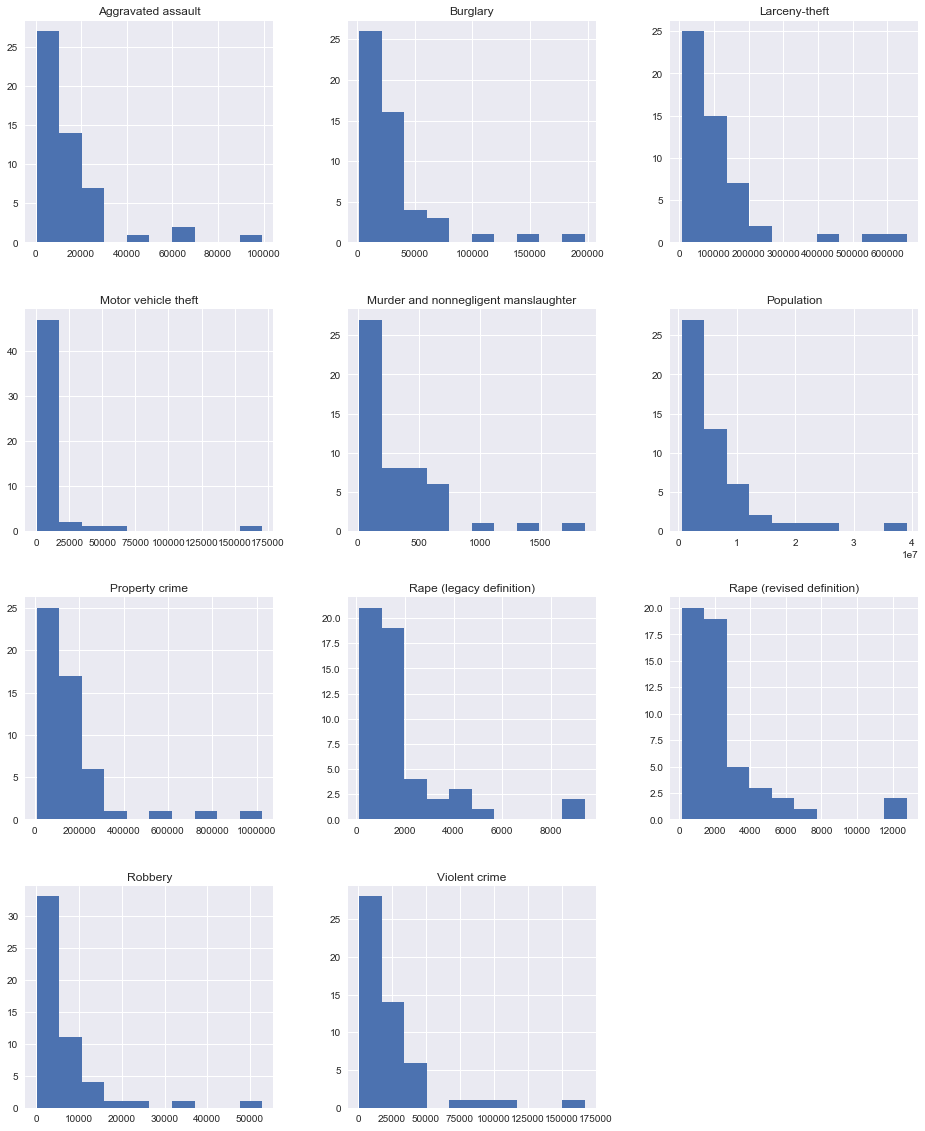

In [76]:
%matplotlib inline
histograms = data2.hist(figsize=(16,20))

The above diagrams shows that frequency of the different crimes in USA for 2015

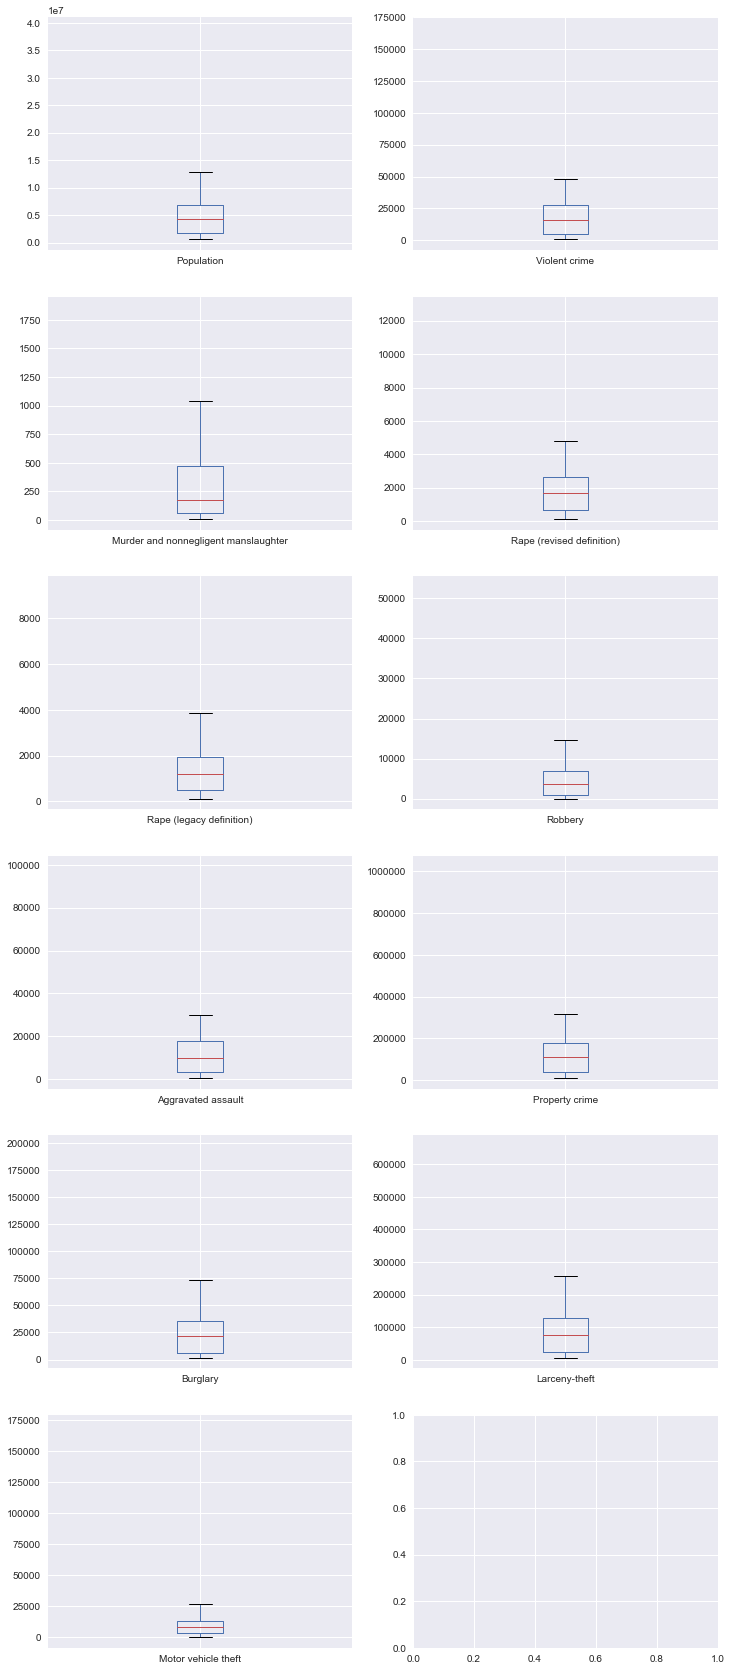

In [77]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,30))

colNameList = list(data2.columns)
n = 0
for i in range(0,int(len(data2.columns)/2)+1):
    for j in range(0,2):
        if(n < 11):
            data2.boxplot(column=colNameList[n],ax=axes[i,j])
            n+=1

Box Plot showing the value of mean crimes in USA for 2014. Box plots provids an esay way to graphically represent the numerical value of any variable

In [78]:
correlations = data2.corr()
correlations

Population  Violent crime  \
Population                              1.000000       0.978722   
Violent crime                           0.978722       1.000000   
Murder and nonnegligent manslaughter    0.944219       0.950616   
Rape (revised definition)               0.957670       0.957011   
Rape (legacy definition)                0.960407       0.958501   
Robbery                                 0.980548       0.980267   
Aggravated assault                      0.960138       0.995026   
Property crime                          0.972552       0.975371   
Burglary                                0.946068       0.954387   
Larceny-theft                           0.976224       0.974370   
Motor vehicle theft                     0.877477       0.895763   

                                      Murder and nonnegligent manslaughter  \
Population                                                        0.944219   
Violent crime                                                     0.950616   
Murder and nonnegligent manslaughter                              1.000000   
Rape (revised definition)                                         0.908795   
Rape (legacy definition)                                          0.907907   
Robbery                                                           0.944614   
Aggravated assault                                                0.937872   
Property crime                                                    0.939977   
Burglary                                                          0.932117   
Larceny-theft                                                     0.937715   
Motor vehicle theft                                               0.851775   

                                      Rape (revised definition)  \
Population                                             0.957670   
Violent crime                                          0.957011   
Murder and nonnegligent manslaughter                   0.908795   
Rape (revised definition)                              1.000000   
Rape (legacy definition)                               0.998350   
Robbery                                                0.926580   
Aggravated assault                                     0.946031   
Property crime                                         0.956212   
Burglary                                               0.935931   
Larceny-theft                                          0.962961   
Motor vehicle theft                                    0.838273   

                                      Rape (legacy definition)   Robbery  \
Population                                            0.960407  0.980548   
Violent crime                                         0.958501  0.980267   
Murder and nonnegligent manslaughter                  0.907907  0.944614   
Rape (revised definition)                             0.998350  0.926580   
Rape (legacy definition)                              1.000000  0.931880   
Robbery                                               0.931880  1.000000   
Aggravated assault                                    0.946094  0.957442   
Property crime                                        0.961773  0.958882   
Burglary                                              0.942705  0.932727   
Larceny-theft                                         0.967848  0.953774   
Motor vehicle theft                                   0.844837  0.909766   

                                      Aggravated assault  Property crime  \
Population                                      0.960138        0.972552   
Violent crime                                   0.995026        0.975371   
Murder and nonnegligent manslaughter            0.937872        0.939977   
Rape (revised definition)                       0.946031        0.956212   
Rape (legacy definition)                        0.946094        0.961773   
Robbery                                         0.957442        0.958882   
Aggravated assault                            

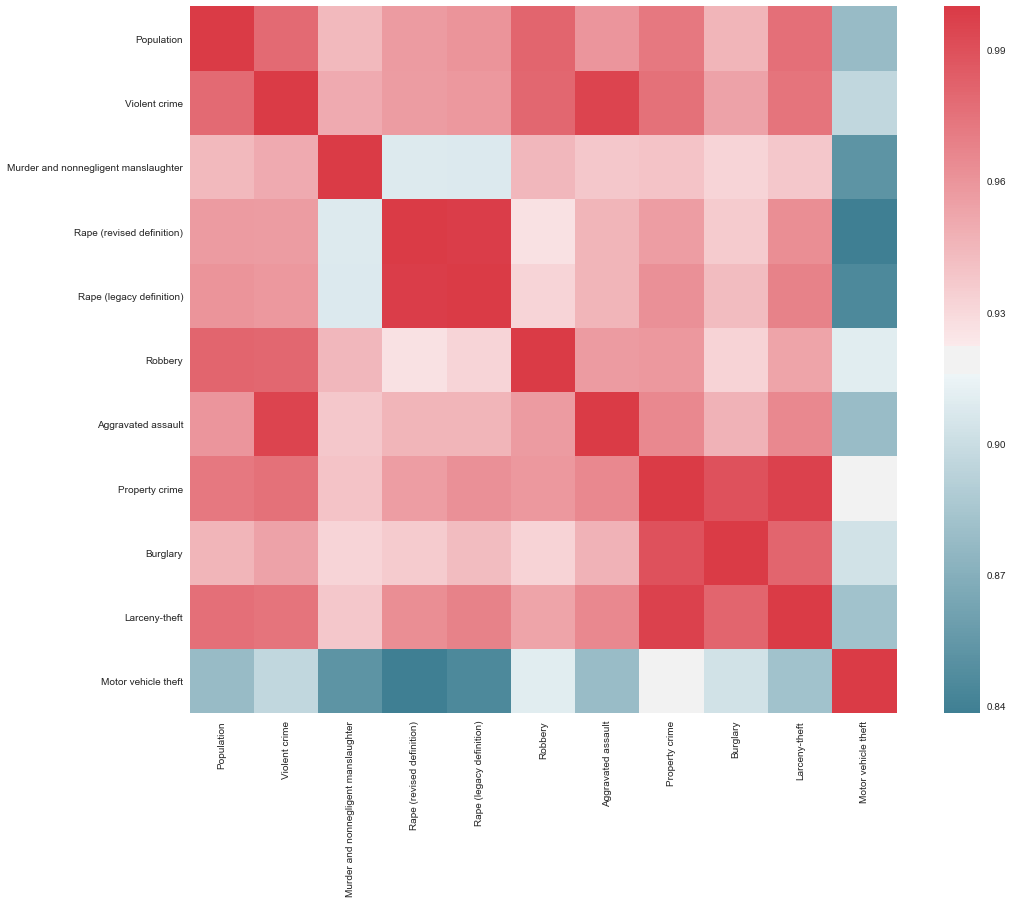

In [79]:
f, ax = plt.subplots(figsize=(17, 13))
sns.heatmap(correlations, mask=np.zeros_like(correlations, dtype=np.bool), \
            cmap=sns.diverging_palette(220, 10, as_cmap=True,center="light"),
            square=True, ax=ax)

This is the representation for the correlation matrix. The diagonal element show the maximum correlation which is obvious because it shows the correlation with itself. Apart from that we can also see many varibale are __highly correlated__ and are playing importnat role in deciding the crime rate in USA. The five most correlated values can be seen below.

In [80]:
mask = np.tril(np.ones(correlations.shape)).astype(np.bool)
for i in range(0,correlations.shape[0]):
    mask[i][i] = False
correlationsApp = correlations.where(mask)
mostCorr = correlationsApp.stack().nlargest(5)

#five most correlated variables
mostCorr

Rape (legacy definition)  Rape (revised definition)    0.998350
Larceny-theft             Property crime               0.996260
Aggravated assault        Violent crime                0.995026
Burglary                  Property crime               0.989447
Robbery                   Population                   0.980548
dtype: float64

The two new definitions of _Rape_ are showing maximum correlation. And this is obvious as both are of same category. The most important factor is the correlation between __Aggravated Crime and Violent Crime__. This correlation tells us that violent crimes are highly contributed by aggravated assaults. Similarly *Burglary* is highly correlated by Property Crime. One more highy contrasting feature is that Robbery is in highly correlated by the population which means the strength of popolation directly affects the crime Robbery. The results are in-line with that of the resuts of 2014. 

During pur regression a similar pattern has been observed.

**Later we used such correlation in our regression to compute the linear fit and tried to predict the data for the crimes.**